<a href="https://colab.research.google.com/github/RichardKameri/Ml1/blob/main/obesity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.zip')

In [3]:
# obesity
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
# columns in the dataset
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
# basic statistical details about the data
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [9]:
# lets see the target variable gender
df['Gender'].value_counts()


,count
Gender,
Male,1068
Female,1043


<Axes: xlabel='Gender'>

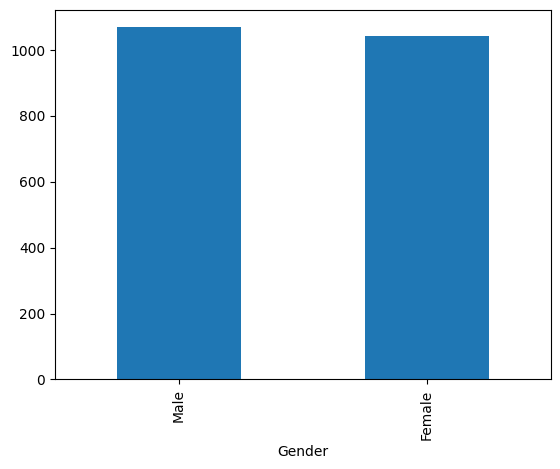

In [10]:
# lets see the target variable gender
df['Gender'].value_counts().plot(kind = 'bar')

In [11]:
# input/indipendent variables
x = df.drop('Gender', axis = 1)
y = df['Gender']

In [12]:
# split the data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rfc = RandomForestClassifier()

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame
# ... (your previous code) ...

# input/indipendent variables
x = df.drop('Gender', axis=1)
y = df['Gender']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Fit the encoder to your categorical features and transform them
categorical_features = x.select_dtypes(include=['object']).columns # Select object type columns
encoded_features = encoder.fit_transform(x[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features
x = x.drop(categorical_features, axis=1)
x = pd.concat([x, encoded_df], axis=1)

# split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
predictions = rfc.predict(x_test)

In [22]:
# compare y_test and the predicted value for X_test by our log_model.
pd.DataFrame({'Actual': y_test, 'Predicted': predictions})


,Actual,Predicted
544,Female,Female
1987,Female,Female
420,Male,Male
527,Female,Female
196,Male,Male
...,...,...
447,Male,Male
1793,Male,Male
73,Male,Male
1711,Male,Male


In [24]:
y_test.values

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
  

In [19]:
# the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[201,   9],
       [  3, 210]])

In [25]:
pd.crosstab(y_test, predictions)

col_0,Female,Male
Gender,,
Female,201,9
Male,3,210


In [26]:
predictions

array(['Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Female', 'Male', 'Female',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female',
       'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
       'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female',
       'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Female',
       'Male', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male',
      

In [20]:
# the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9716312056737588